#### Importing Dependencies

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

#### Data collection & Processing

In [2]:
# Loading the data from csv file to Pandas Dataframe

titanic_df = pd.read_csv('train.csv')

In [3]:
# veiwing the first 5 rows of df

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# number of rows and columns

titanic_df.shape

(891, 12)

In [5]:
# getting information about the data

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# checking for missing values in columns

titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Handling the Missing values

In [7]:
# dropping the 'Cabin' column from dataframe
# dropping 'PassengerId'

titanic_df = titanic_df.drop(columns=['Cabin', 'PassengerId'])

In [8]:
# Filling the null values in 'Age' column with mean value

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

In [9]:
# Finding the mode value of 'Embarked' column
print(titanic_df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [10]:
# Filling null values in 'Emabarked' column with mode value

titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [11]:
# Rechecking for missing values
titanic_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

#### Data Analysis

In [12]:
# Getting some statistical measures sbout numeric data

titanic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


In [13]:
# distribution of catagorical features

titanic_df.describe(include=['O']).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Embarked,891,3,S,646


In [14]:
# Considering family size

titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

In [15]:
titanic_df['Alone'] = 1
titanic_df.loc[titanic_df['FamilySize'] > 1, 'Alone'] = 0

In [16]:
# Considering the Name

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [17]:
titanic_df['Title'] = titanic_df['Name'].apply(get_title)

title_counts = titanic_df['Title'].value_counts()
print(title_counts)

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64


In [18]:
# Grouping all non-common titles into one single grouping "Rare"

titanic_df['Title'] = titanic_df['Title'].replace(['Dr','Rev','Major','Col','Countess',
                                                   'Capt','Sir','Lady','Don','Jonkheer'], 'Rare')

titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Ms', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')

In [19]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Alone,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,Mr


In [20]:
# finding the number of peoplr survived and not survived

titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [21]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [22]:
# Survival rate based on gender/sex

titanic_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [23]:
# Survival rate based on class

titanic_df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [52]:
# Survival rate based on family size

titanic_df[["FamilySize", "Survived"]].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [51]:
# Survival rate based Alone

titanic_df[["Alone", "Survived"]].groupby(['Alone'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Alone,Survived
0,0,0.505650
1,1,0.303538


#### Data Visualization

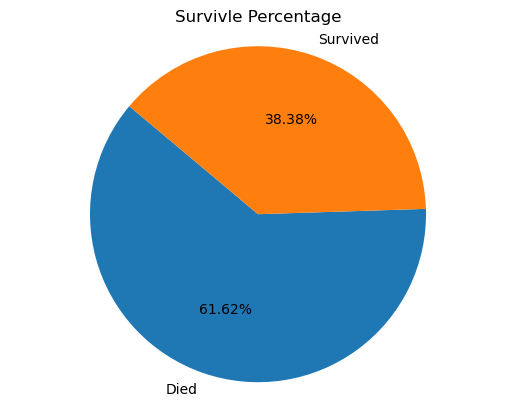

In [57]:
plt.pie(titanic_df['Survived'].value_counts(), labels=['Died','Survived'], autopct='%1.2f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Survivle Percentage')  # Set the title
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

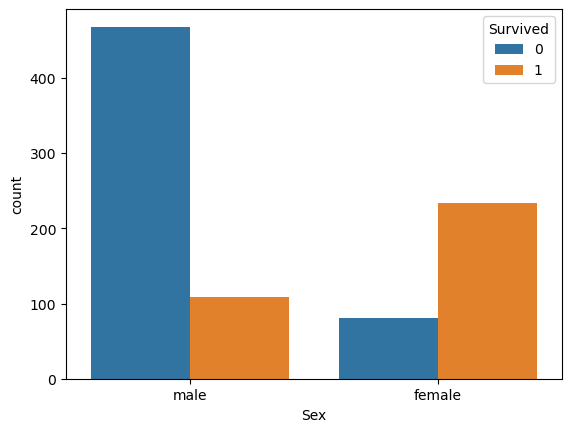

In [24]:
# number of survivors Gender wise

sns.countplot(x='Sex', hue='Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='count'>

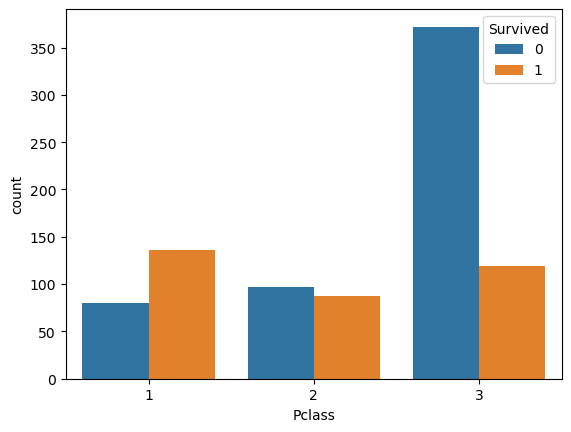

In [25]:
# number of survivors Class wise

sns.countplot(x='Pclass', hue='Survived', data=titanic_df)

<Axes: xlabel='Alone', ylabel='count'>

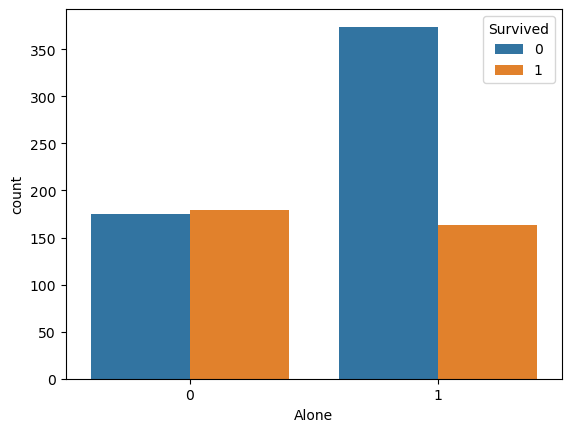

In [31]:
# number of survivors based on Alone

sns.countplot(x='Alone', hue='Survived', data=titanic_df)

<Axes: xlabel='Embarked', ylabel='count'>

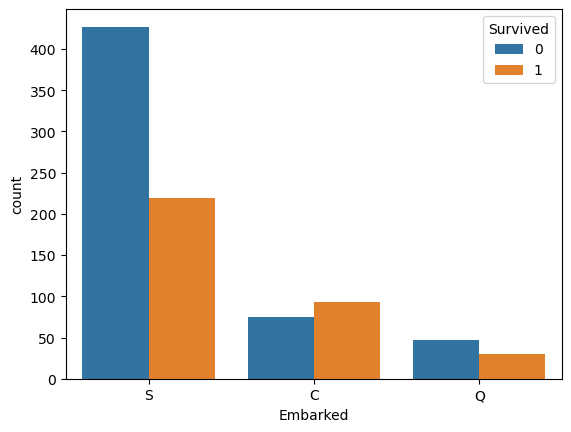

In [26]:
# number of survivors based on Embarked location

sns.countplot(x='Embarked', hue='Survived', data=titanic_df)

<Axes: xlabel='Title', ylabel='count'>

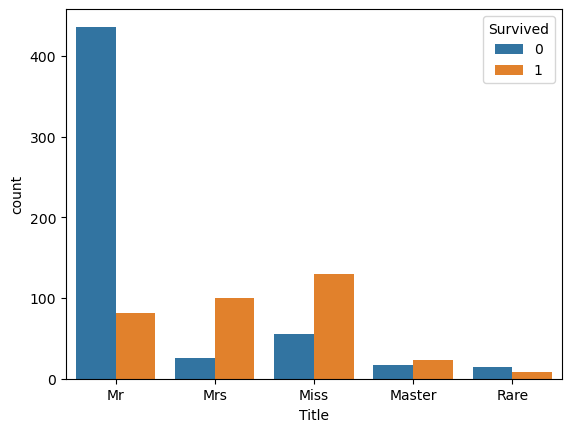

In [27]:
# number of survivors Title wise

sns.countplot(x='Title', hue='Survived', data=titanic_df)

In [30]:
# Survival rate based on title

titanic_df[["Title", "Survived"]].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


<Axes: xlabel='FamilySize', ylabel='count'>

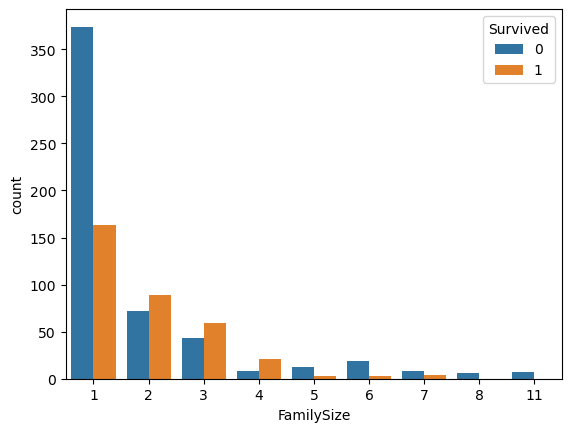

In [99]:
sns.countplot(x='FamilySize', hue='Survived', data=titanic_df)

<Axes: xlabel='Age', ylabel='Count'>

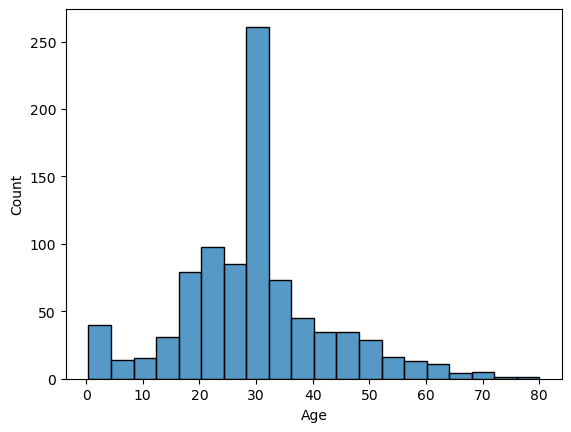

In [35]:
# Distribution of passenger by age

sns.histplot(data=titanic_df,x='Age', bins=20)

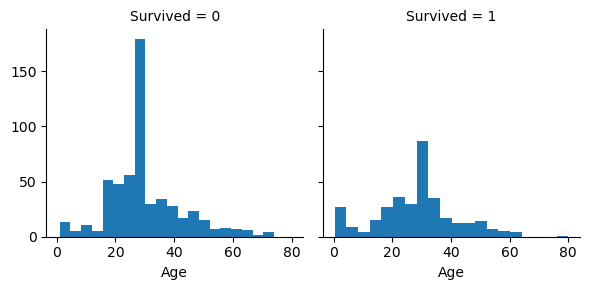

In [44]:
g = sns.FacetGrid(titanic_df, col='Survived')
g.map(plt.hist, 'Age', bins=20);

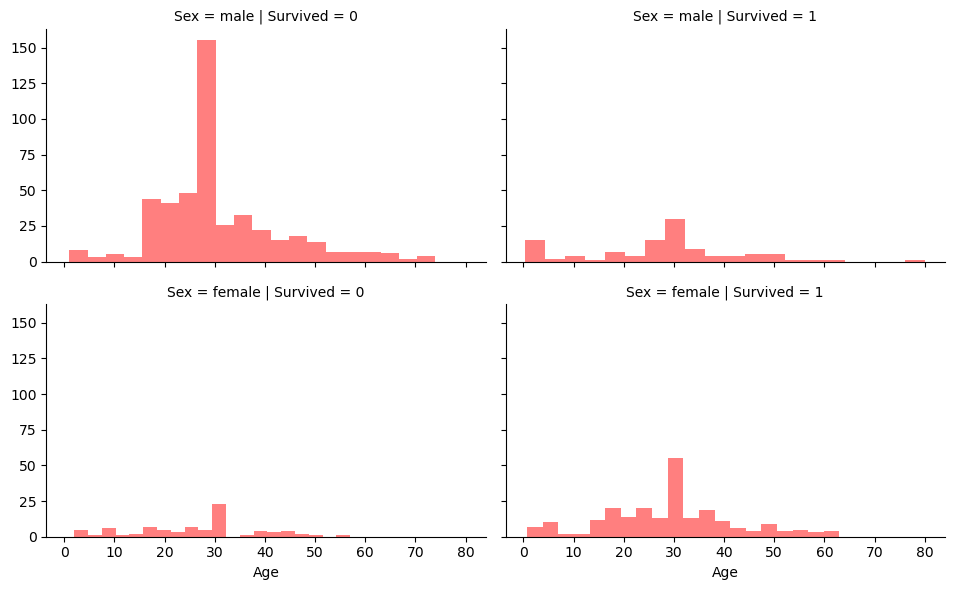

In [58]:
g = sns.FacetGrid(titanic_df, col='Survived', row='Sex', aspect=1.6)
g.map(plt.hist, 'Age', alpha=.5, bins=20, color='r')
g.add_legend();

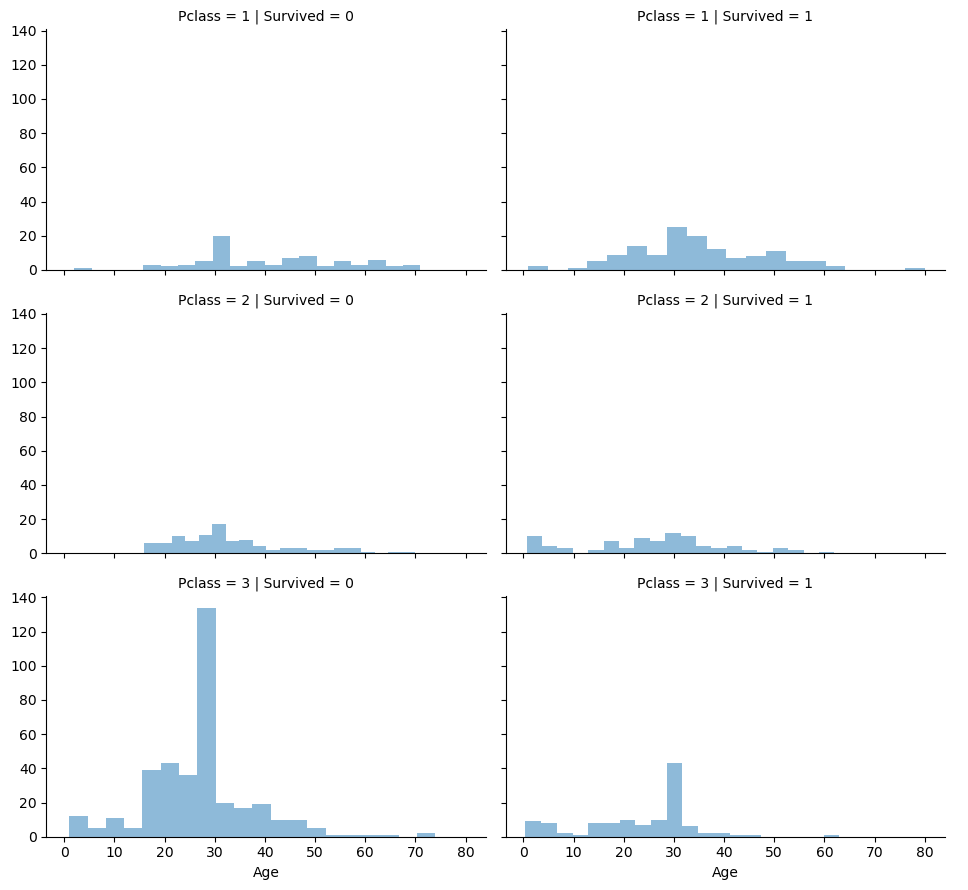

In [59]:
g = sns.FacetGrid(titanic_df, col='Survived', row='Pclass', aspect=1.6)
g.map(plt.hist, 'Age', alpha=.5, bins=20)
g.add_legend();

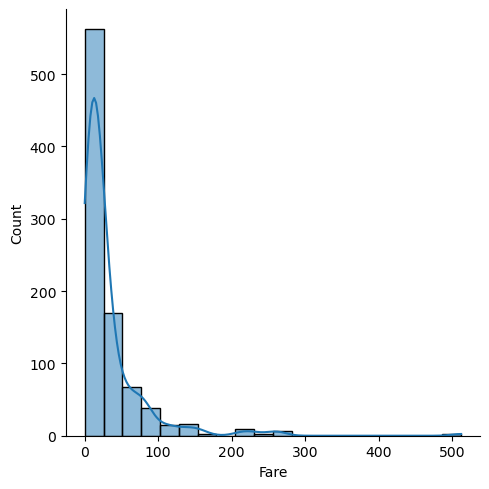

In [41]:
# Distribution of passenger by fare

sns.displot(data=titanic_df,x='Fare',kde=True, bins=20)

#### Encoding the Categorical Columns

In [61]:
# converting categorical columns

titanic_df.replace({'Sex':{'male':0 , 'female':1},
                    'Embarked':{'S':0, 'C':1, 'Q':2},
                    'Title':{"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}}, inplace=True)

In [62]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Alone,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,2,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,2,0,3
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,2,0,3
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,1,1


#### Separating features & target

In [90]:
# Features_df
X = titanic_df.drop(columns=['Survived','Name','SibSp','Parch','Ticket','Alone'])
# Target
Y = titanic_df['Survived']

In [91]:
X

,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,3,0,22.000000,7.2500,0,2,1
1,1,1,38.000000,71.2833,1,2,3
2,3,1,26.000000,7.9250,0,1,2
3,1,1,35.000000,53.1000,0,2,3
4,3,0,35.000000,8.0500,0,1,1
...,...,...,...,...,...,...,...
886,2,0,27.000000,13.0000,0,1,5
887,1,1,19.000000,30.0000,0,1,2
888,3,1,29.699118,23.4500,0,4,2
889,1,0,26.000000,30.0000,1,1,1


#### Spliting the data into training data & test data

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=17)

In [93]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


#### Model Training

> Logistic Regression

In [94]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, Y_train)
train_pred1 = model1.predict(X_train)
test_pred1 = model1.predict(X_test)

In [95]:
train_data_acc = accuracy_score(Y_train, train_pred1)
test_data_acc = accuracy_score(Y_test, test_pred1)

print('Accuracy score of training data: ',train_data_acc)
print('Accuracy score of test data: ',test_data_acc)

Accuracy score of training data:  0.8202247191011236
Accuracy score of test data:  0.8044692737430168
